In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Load the dataset
df = pd.read_excel('myexcel.xlsx')

# Display the full dataset
df


,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,2023-02-06 00:00:00,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,2023-06-06 00:00:00,235,Marquette,6796117.0
2,John Holland,Boston Celtics,30,SG,27,2023-05-06 00:00:00,205,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28,SG,22,2023-05-06 00:00:00,185,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8,PF,29,2023-10-06 00:00:00,231,NaN,5000000.0
...,...,...,...,...,...,...,...,...,...
453,Shelvin Mack,Utah Jazz,8,PG,26,2023-03-06 00:00:00,203,Butler,2433333.0
454,Raul Neto,Utah Jazz,25,PG,24,2023-01-06 00:00:00,179,NaN,900000.0
455,Tibor Pleiss,Utah Jazz,21,C,26,2023-03-07 00:00:00,256,NaN,2900000.0
456,Jeff Withey,Utah Jazz,24,C,26,7-0,231,Kansas,947276.0


In [3]:
# Convert 'height' column to numeric, invalid values will become NaN and replace NaN or invalid height values with random numbers between 150 and 180
df['Height'] = pd.to_numeric(df['Height'], errors='coerce')
df['Height'] = df['Height'].apply(lambda x: np.random.randint(150, 181) if pd.isna(x) or x < 150 or x > 180 else x)
df

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,150,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,166,235,Marquette,6796117.0
2,John Holland,Boston Celtics,30,SG,27,180,205,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28,SG,22,168,185,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8,PF,29,156,231,NaN,5000000.0
...,...,...,...,...,...,...,...,...,...
453,Shelvin Mack,Utah Jazz,8,PG,26,163,203,Butler,2433333.0
454,Raul Neto,Utah Jazz,25,PG,24,150,179,NaN,900000.0
455,Tibor Pleiss,Utah Jazz,21,C,26,171,256,NaN,2900000.0
456,Jeff Withey,Utah Jazz,24,C,26,165,231,Kansas,947276.0


In [4]:
# Check for NaN values

print(df['Height'].isna().sum())

0


In [5]:
#Checking

df['Height'].describe()

count    458.00000
mean     164.59607
std        9.02395
min      150.00000
25%      157.00000
50%      164.00000
75%      173.00000
max      180.00000
Name: Height, dtype: float64

In [6]:
# Saving the cleaned dataset

df.to_csv("myexcelcleaned.csv", index=False)
df

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,150,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,166,235,Marquette,6796117.0
2,John Holland,Boston Celtics,30,SG,27,180,205,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28,SG,22,168,185,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8,PF,29,156,231,NaN,5000000.0
...,...,...,...,...,...,...,...,...,...
453,Shelvin Mack,Utah Jazz,8,PG,26,163,203,Butler,2433333.0
454,Raul Neto,Utah Jazz,25,PG,24,150,179,NaN,900000.0
455,Tibor Pleiss,Utah Jazz,21,C,26,171,256,NaN,2900000.0
456,Jeff Withey,Utah Jazz,24,C,26,165,231,Kansas,947276.0


In [7]:
df['Height'].describe()

count    458.00000
mean     164.59607
std        9.02395
min      150.00000
25%      157.00000
50%      164.00000
75%      173.00000
max      180.00000
Name: Height, dtype: float64

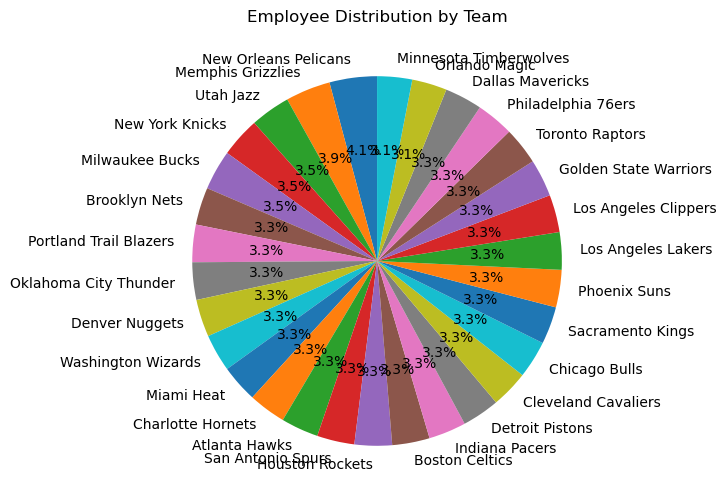

In [8]:
#1) Distribution of employees across each team and calculation of percentage split relative to the total number of employees

# Count the number of employees in each team
team_counts = df['Team'].value_counts()
# Total number of emoployees
total_employees = len(df)
#calculating the percentage
team_percentage = (team_counts / total_employees) * 100
#creating a DataFrame to display the result
team_distribution = pd.DataFrame({
    'Number of Employees': team_counts,
    'Percentage of Total': team_percentage})

#creating a pie chart for team distribution
plt.figure(figsize=(8, 6))
team_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, legend=False)
plt.title('Employee Distribution by Team')
plt.ylabel('')
plt.show()

In [9]:
#Displaying Team_distribution

team_distribution

,Number of Employees,Percentage of Total
Team,,
New Orleans Pelicans,19,4.148472
Memphis Grizzlies,18,3.930131
Utah Jazz,16,3.493450
New York Knicks,16,3.493450
Milwaukee Bucks,16,3.493450
Brooklyn Nets,15,3.275109
Portland Trail Blazers,15,3.275109
Oklahoma City Thunder,15,3.275109
Denver Nuggets,15,3.275109


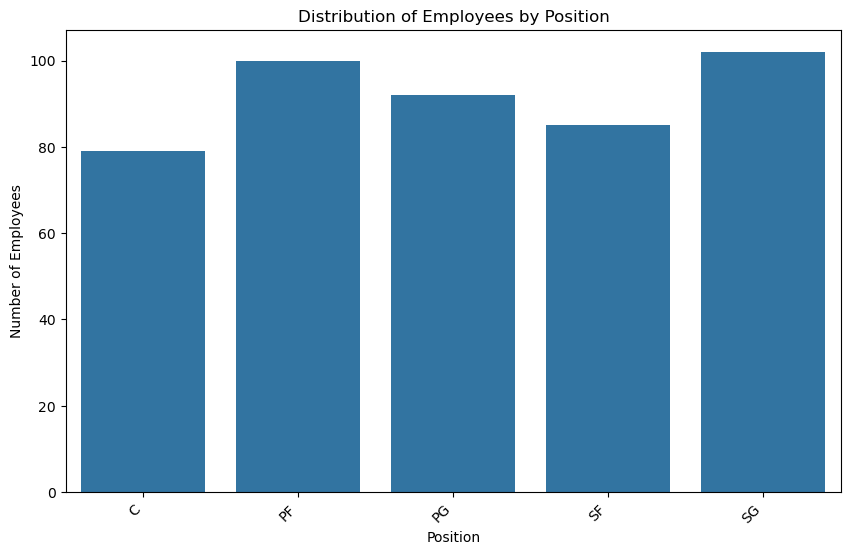

In [10]:
#2) Employees based on their positions within the company

#Grouping Employees by thier position
position_counts = df.groupby('Position').size()
position_counts


#Plotting a bar chart for position distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=position_counts.index, y=position_counts.values)
plt.title('Distribution of Employees by Position')
plt.xlabel('Position')
plt.ylabel('Number of Employees')
plt.xticks(rotation=45, ha='right')
plt.show()

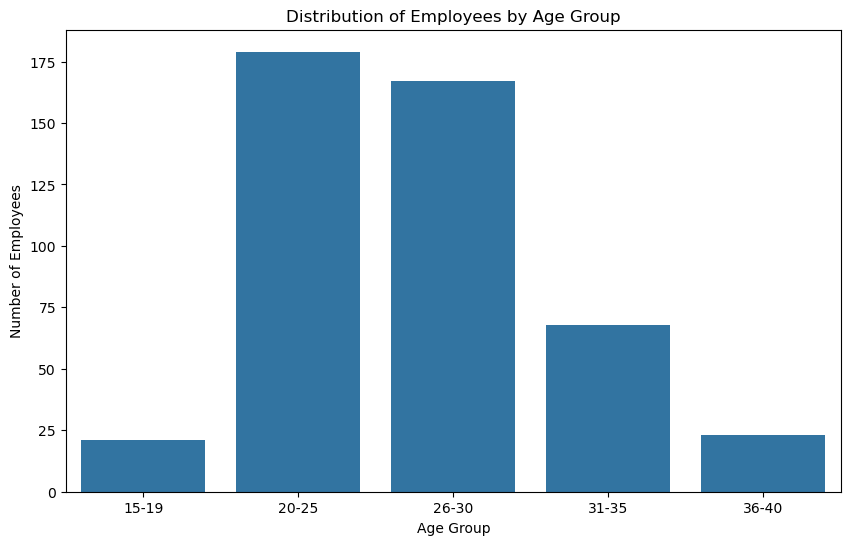

In [11]:
# 3) Create age groups and count employees

bins = [15,20,25,30,35,40]
labels = ['15-19','20-25', '26-30', '31-35','36-40']
df['age_group'] = pd.cut(df['Age'], bins=bins, labels=labels)
# Count employees in each age group
age_group_counts = df['age_group'].value_counts()
age_group_counts


#Plotting a bar chart for age group distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=age_group_counts.index, y=age_group_counts.values)
plt.title('Distribution of Employees by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Employees')
plt.show()

Cleveland Cavaliers , C


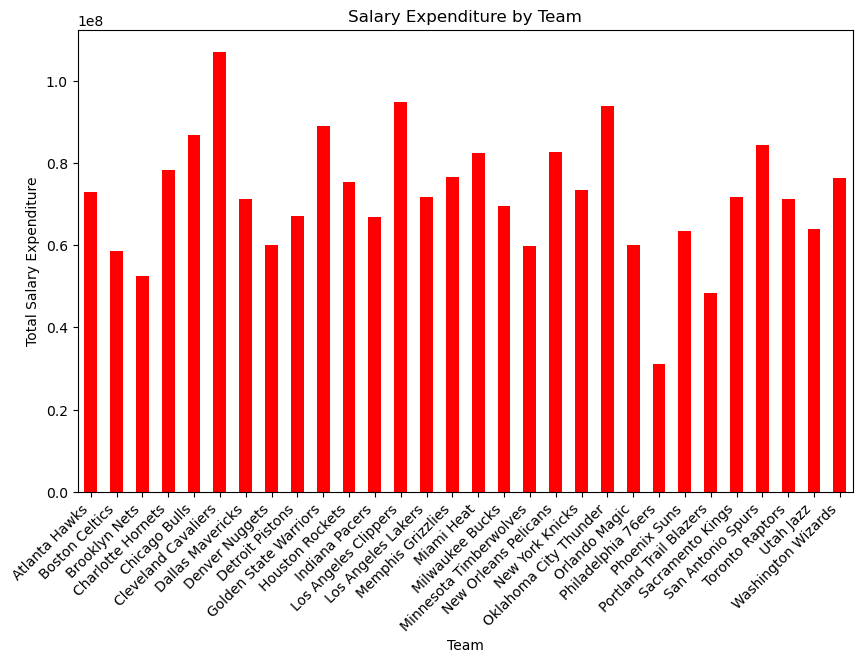

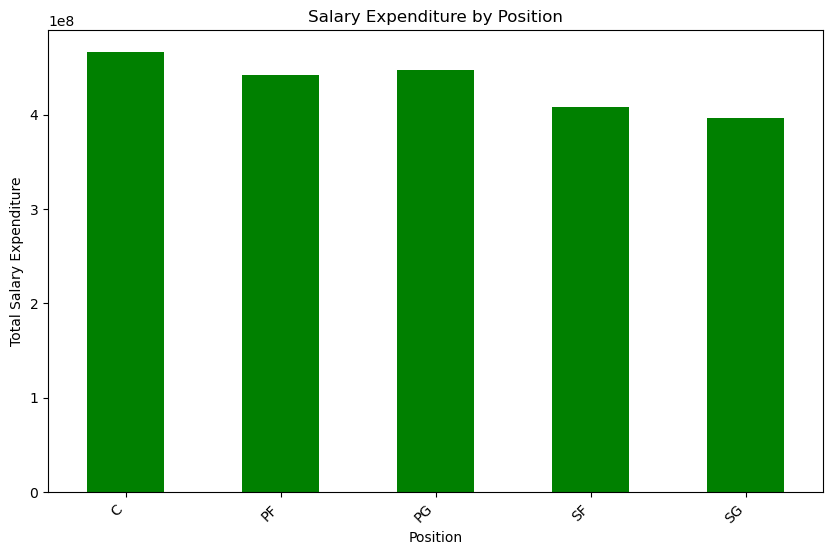

In [50]:
#4) Discovering which team and position have the highest salary expenditure

# Group by team and position and sum the salaries
team_salary = df.groupby('Team')['Salary'].sum()
position_salary = df.groupby('Position')['Salary'].sum()
# Find the team and position with the highest salary expenditure
highest_team_salary = team_salary.idxmax()
highest_position_salary = position_salary.idxmax()
print(highest_team_salary,',', highest_position_salary)


#Creating a bar plot for team salary expenditure
plt.figure(figsize=(10, 6))
team_salary.plot(kind='bar', color='r')
plt.title('Salary Expenditure by Team')
plt.xlabel('Team')
plt.ylabel('Total Salary Expenditure')
plt.xticks(rotation=45, ha='right')
plt.show()

#Creating a bar plot for position salary expenditure
plt.figure(figsize=(10, 6))
position_salary.plot(kind='bar', color='g')
plt.title('Salary Expenditure by Position')
plt.xlabel('Position')
plt.ylabel('Total Salary Expenditure')
plt.xticks(rotation=45, ha='right')
plt.show()

Correlation between age and salary: 0.2140094122657098


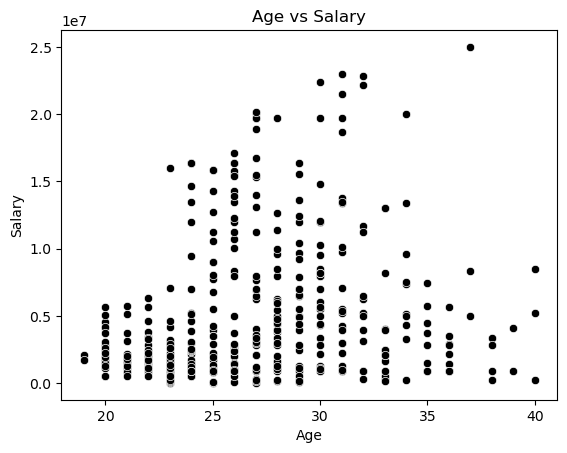

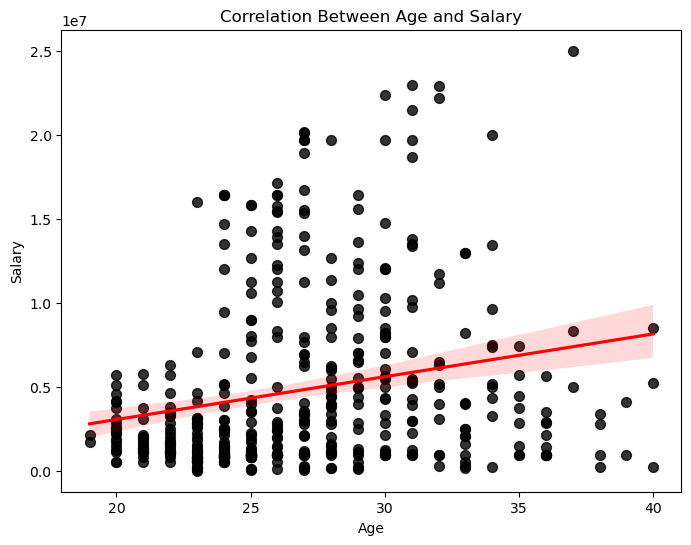

In [72]:
#5) Checking correlation between age and salary

correlation = df['Age'].corr(df['Salary'])
print(f"Correlation between age and salary: {correlation}")


#Creating a scatter plot for age and salary
sns.scatterplot(x='Age', y='Salary',color='black', data=df)
plt.title("Age vs Salary")
plt.show()

#Creating a scatter plot for age vs salary with regression line
plt.figure(figsize=(8, 6))
sns.regplot(x='Age', y='Salary', data=df, scatter_kws={'s': 50, 'color': 'black'}, line_kws={'color': 'red'})
plt.title('Correlation Between Age and Salary')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.show()

This project successfully analyzed the 'myexcel.xlsx' dataset by addressing data inconsistencies, providing valuable insights into team and position distributions, age demographics, and salary patterns. The correlation analysis highlighted relationships between variables, and the cleaned dataset ensures accurate future use